<a href="https://colab.research.google.com/github/ImSumitJadhav/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction_CLASS_(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Name: Sumit Vasant Jadhav**

#<font color='red'> **Project Name- Mobile price range prediction**

#<font color='red'> **Problem Statement**

In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices.The objective is to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

##<font color='red'> **Let's Go.....**

In [ ]:
#import library and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warings
import warnings
warnings.filterwarnings('ignore')

#import drive
from google.colab import drive

In [ ]:
#mount drive
drive.mount('/content/MyDrive')  
df=pd.read_csv('/content/MyDrive/MyDrive/Project 3/data_mobile_price_range.csv')

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


In [ ]:
#to show top 5 rows
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
#to show bottom 5 rows
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [ ]:
#size of dataframe
df.shape

(2000, 21)

# <font color='red'> **Data summary**

In [ ]:
#To get information about numerical variables of dataset
df.describe()  

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# 1.Data Description

Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable.

# 2.Check datatypes of variables 

In [ ]:
#information about null values and datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

1.All features

In [ ]:
#all features including output
all_features=df.columns
print("Count of all fetures {} ".format(len(all_features)))
all_features

Count of all fetures 21 


Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

2.Numerical Features

In [ ]:
#Numerical features
Numerical_features=df.describe().columns
print("Count of Numerical_features {} ".format(len(Numerical_features)))
Numerical_features

Count of Numerical_features 21 


Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Discrete Numerical variables

In [ ]:
#discrete features with unique values less than 10 
d_features=[fea for fea in Numerical_features if len(df[fea].unique())<10]
print("Count of discrete features {} ".format(len(d_features)))
d_features

Count of discrete features 8 


['blue',
 'dual_sim',
 'four_g',
 'n_cores',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

Continuous Numerical variables

In [ ]:
#continous features with unique values more than 10 
c_features=[fea for fea in Numerical_features if fea not in d_features]
print("Count of continous features {} ".format(len(c_features)))
c_features

Count of continous features 13 


['battery_power',
 'clock_speed',
 'fc',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time']

# 3.Data Cleaning

In [ ]:
#Find NaN values of each row
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

**<<<<<<< There is no null value present in dataframe >>>>>>>**

#<font color='red'> **Data Visualization**

# 1.Check classification type

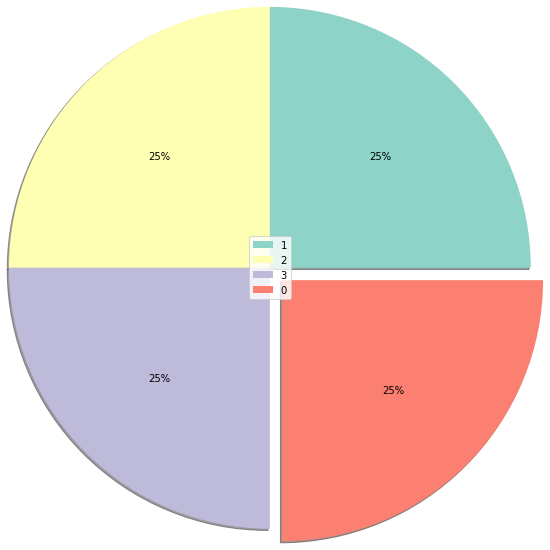

In [ ]:
#pie plot to find exact percentage of output variable
class_type=df["price_range"].value_counts()
#set color style
palette=sns.color_palette("Set3")
plt.pie(class_type,shadow=True,colors=palette,radius=3,autopct='%.0f%%',explode=[0.0,0.0,0.0,0.2])
plt.legend(loc=10,labels=df['price_range'].unique())

0-Low cost

1-Medium cost
 
2-High cost
 
3-Very high cost

**<<<<<<<< Multi class classification >>>>>>>>**

# 2.To find Correlation between features

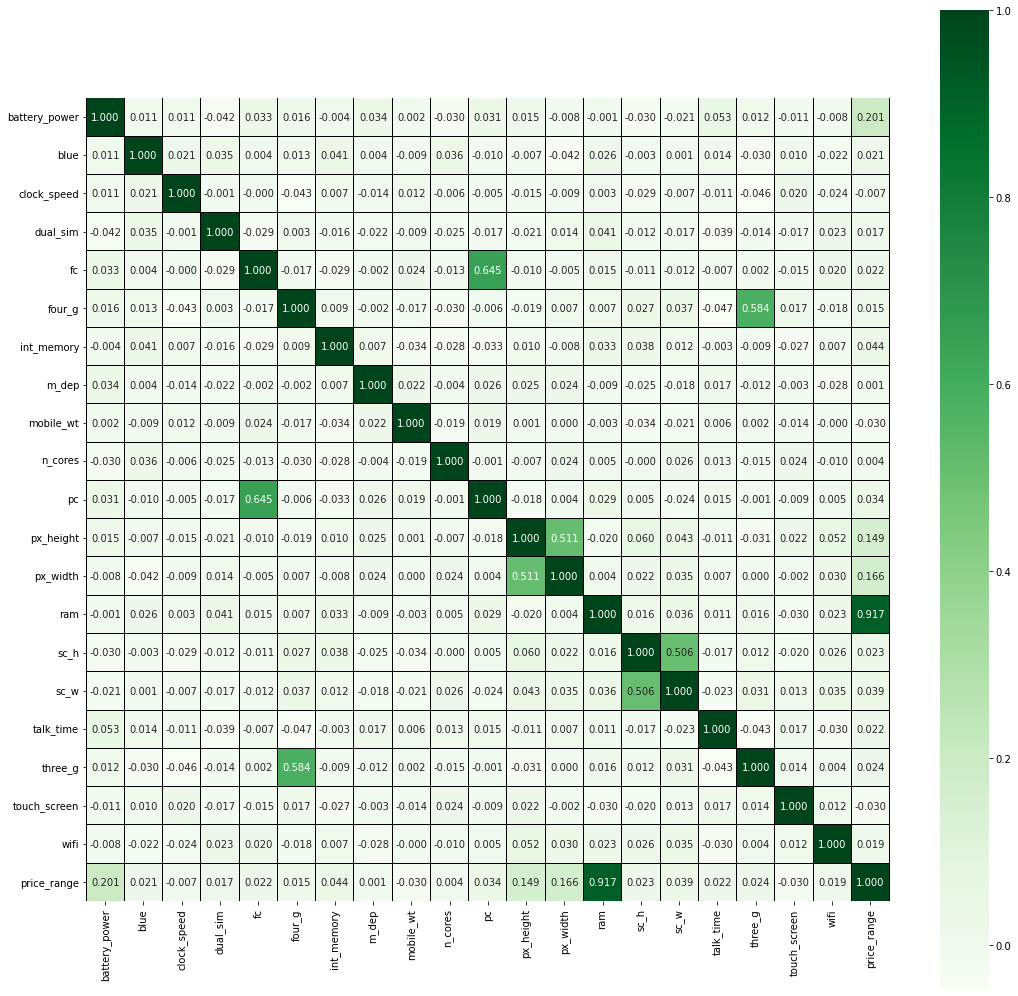

In [ ]:
#Correlation
corr_val=df.corr()  
plt.figure(figsize=(18,18))
sns.heatmap(corr_val,cbar=True,square=True,fmt=".3f",annot=True,annot_kws={"size":10}, cmap="Greens",linewidths=0.01,linecolor="black")

**<<<<< From above heat diagram we clearly find,only "ram" feature has more correlation value with our dependent variable "price_range". >>>>>**

# 3.Distribution of output variable which is "Price_range"

Text(0.5, 1.0, 'Price_range Vs Density of price range')

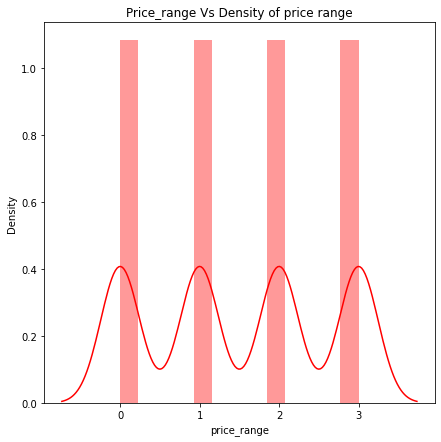

In [ ]:
#Dependent variable 'Price'
plt.figure(figsize=(7,7))
sns.distplot(df['price_range'],color="r")
plt.title("Price_range Vs Density of price range")

**<<<<<<< Balanced Dataset >>>>>>>>**

# 4.Distribution of discrete numerical variables

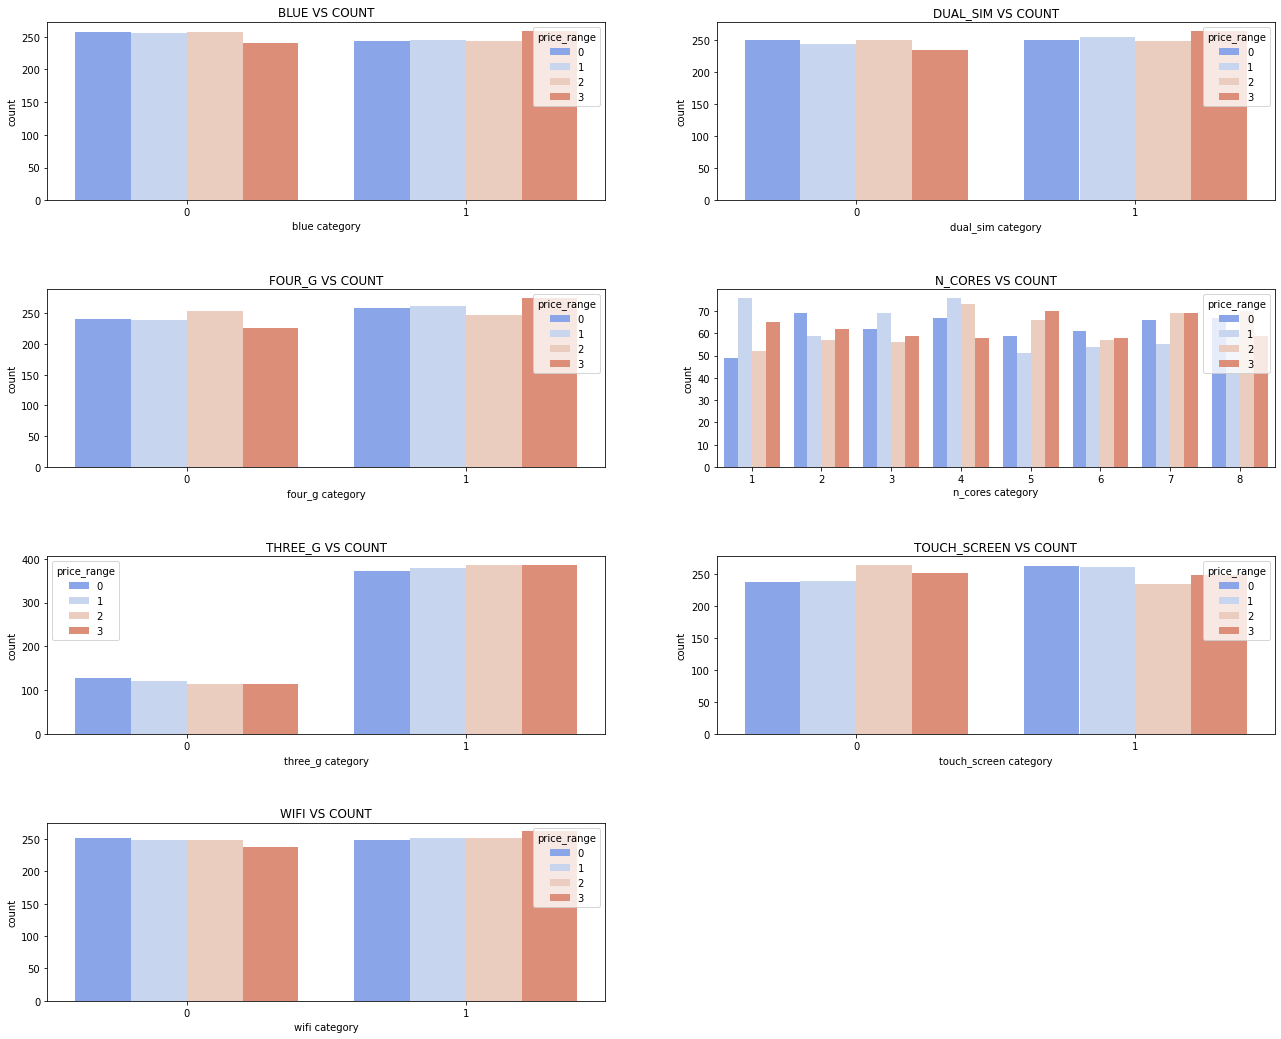

In [ ]:
# create subplots
fig, axs = plt.subplots(figsize=(22,18))

#distance between two plots
plt.subplots_adjust(hspace=0.5)

# loop through the length of discrete features 
#"n" for iterate position of plot
#"m" for select each feature in discrete variable
for n, m in enumerate(d_features[:-1]):
    # add a new subplot iteratively
    ax = plt.subplot(4, 2, n + 1)

    #to plot count of discrete numericals featuers
    sns.countplot(data=df,x=df[m],hue="price_range",palette="coolwarm") 

    # chart formatting
    ax.set_title((m+" "+"Vs"+" "+"Count").upper())
    ax.set_xlabel(m+" category")

# 5.Distribution of continuous numerical variables

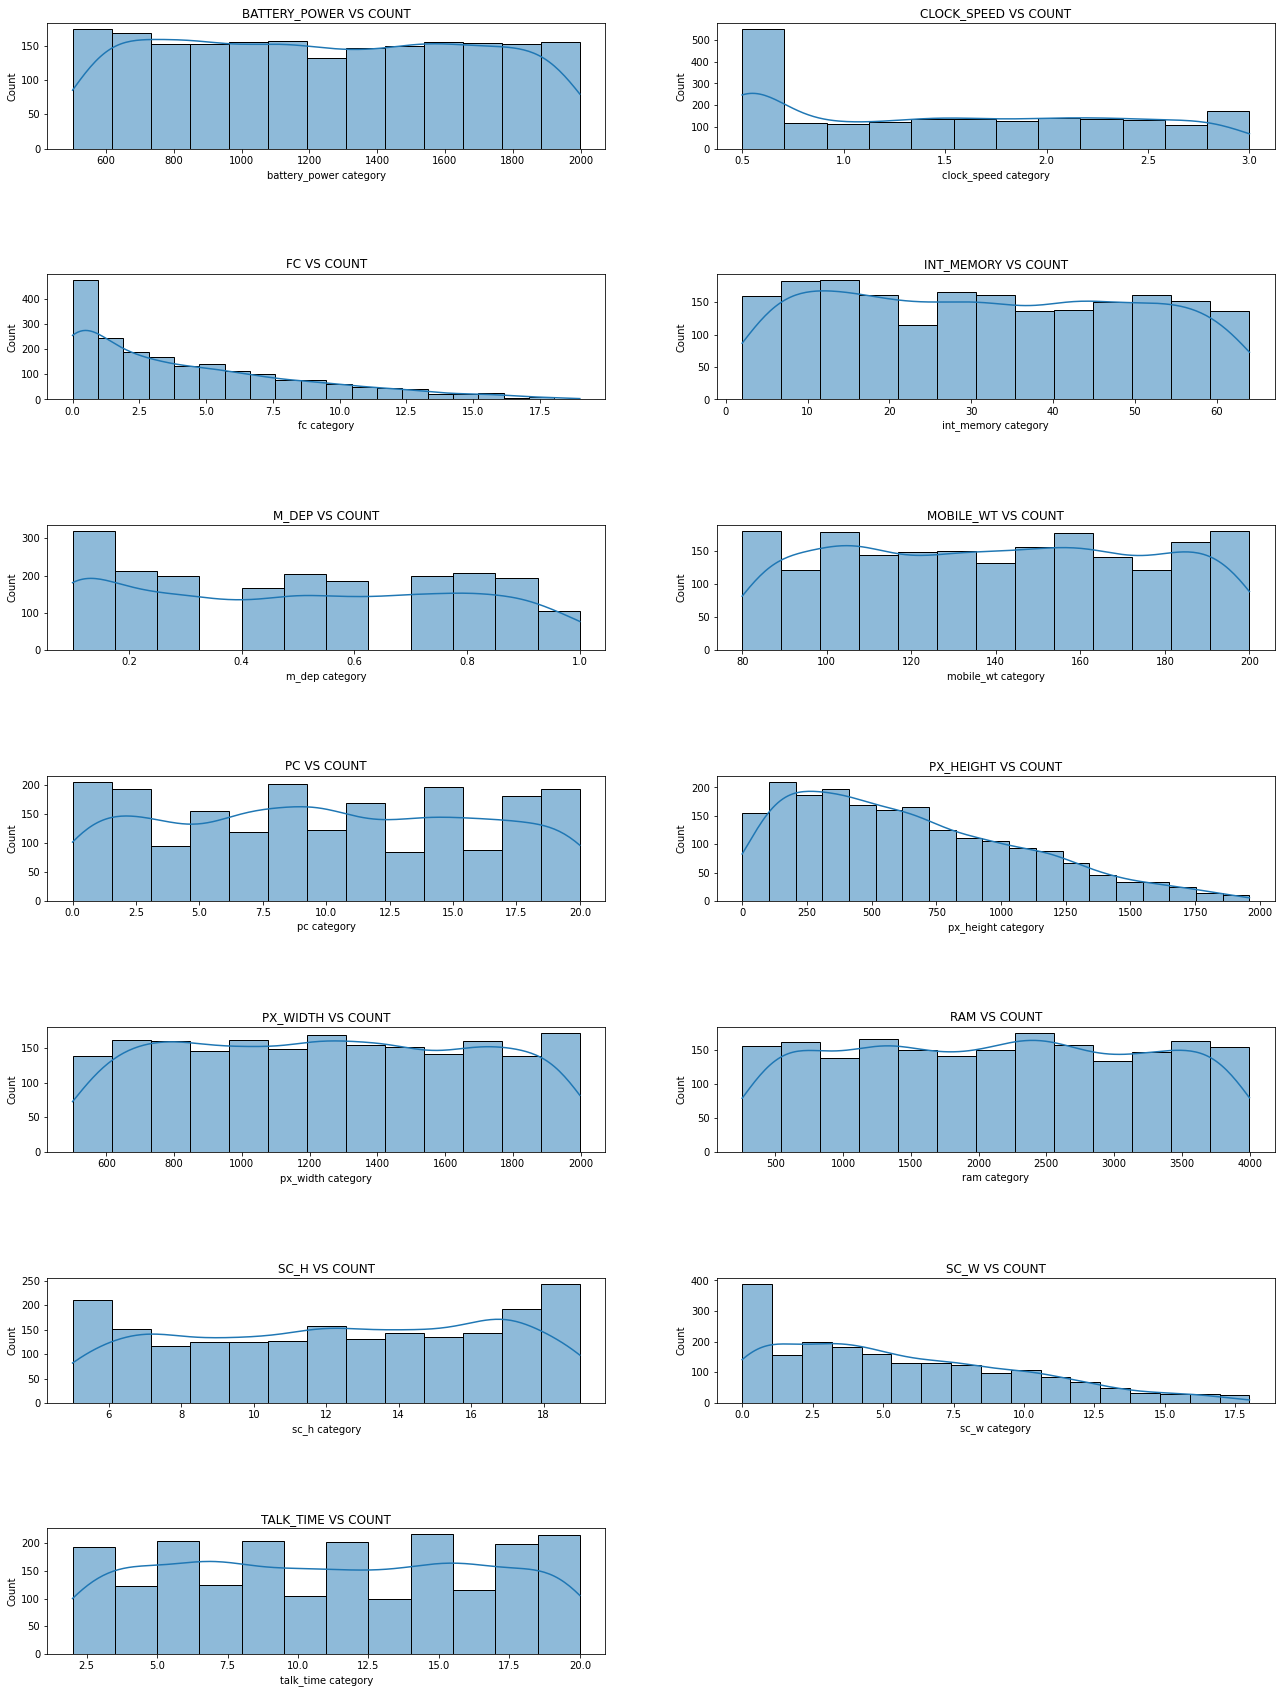

In [ ]:
# create subplots
fig, ax1 = plt.subplots(figsize=(22,30))

#distance between two plots
plt.subplots_adjust(hspace=1)

# loop through the length of continuous features 
#"a" for iterate position of plot
#"b" for select each feature in continuous variable
for a, b in enumerate(c_features):
    # add a new subplot iteratively
    ax1 = plt.subplot(7, 2, a + 1)

    #to plot count of continuous numericals featuers
    sns.histplot(data=df,x=df[b],kde=True) 

    # chart formatting
    ax1.set_title((b+" "+"Vs"+" "+"Count").upper())
    ax1.set_xlabel(b+" category")

# 6.Use Groupby function to analyse discrete features

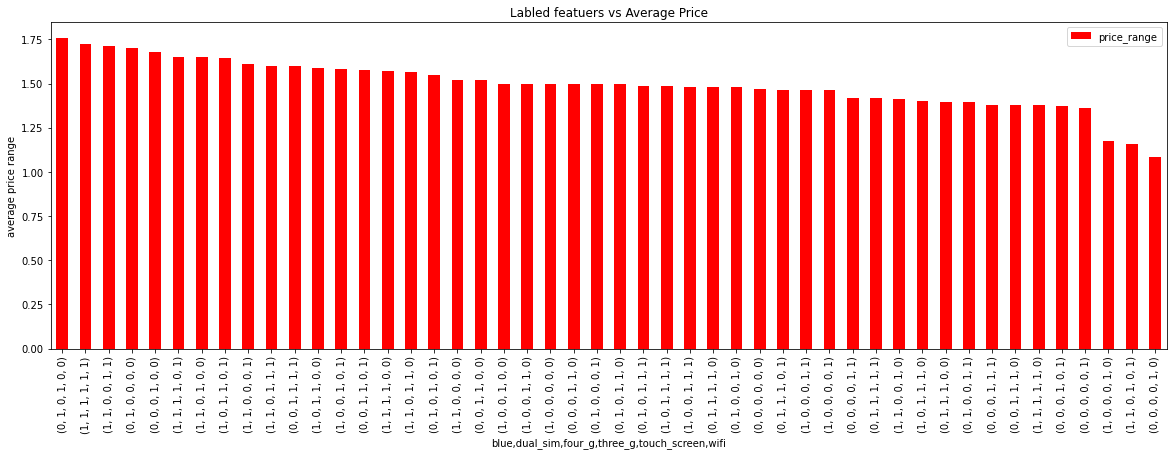

In [ ]:
#grouped by "blue","dual_sim","four_g","three_g","touch_screen","wifi" and "price_range"
df_autox = pd.DataFrame(df.groupby(["blue","dual_sim","four_g","three_g","touch_screen","wifi"])["price_range"].mean().sort_values(ascending = False)) 
df_autox.plot.bar(color="r",figsize=(20, 6))
plt.ylabel('average price range')
plt.title('Labled featuers vs Average Price')
plt.show()

**0=No**

**1=Yes**

#<font color='red'> **Classification Algorithm**

**<<<< As we know,we have four types of mobile range and dataset is non linear.So we use one ensemble method like "XGBoost".Also use "SVM" classification algoritham and compare accuracy score.Select model for this problem which can give better accuracy value >>>>>>**

# 1.Saperate out dependent and independent dataframe

**Dependent feature= "price_range"**

In [ ]:
#independent features
x=df.copy()
x=x.drop("price_range",axis=1)
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [ ]:
#dependent features
y=pd.DataFrame(df["price_range"])
y.head()

,price_range
0,1
1,2
2,2
3,2
4,1


# 2.Train-Test split

In [ ]:
#Train-Test split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state =10) #train data=80%

#size of train and test dataset
print("Train dependent data size {} ".format(X_train.shape))
print("Test dependent data size {} ".format(X_test.shape))
print("Train independent data size {} ".format(y_train.shape))
print("Test independent data size {} ".format(y_test.shape))

Train dependent data size (1600, 20) 
Test dependent data size (400, 20) 
Train independent data size (1600, 1) 
Test independent data size (400, 1) 


In [ ]:
#Train dependent dataset
X_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
811,807,0,0.5,0,9,0,8,0.3,158,5,20,667,697,1284,17,13,2,0,1,1
1631,612,1,0.5,1,1,1,20,0.8,179,8,6,1145,1487,3282,16,2,18,1,1,1
337,668,0,2.3,0,2,1,48,0.3,114,1,19,195,1292,1201,14,12,4,1,1,0
1467,1497,1,0.9,1,4,1,10,0.1,153,8,20,98,977,3696,9,0,3,1,0,1
1561,1076,0,2.3,1,0,1,14,0.7,191,5,0,1088,1718,2355,17,16,2,1,1,1


In [ ]:
#Test dependent data size
X_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
115,1900,1,2.3,0,1,1,18,0.2,89,7,9,1055,1661,2871,12,1,13,1,1,1
1779,1807,1,2.9,0,0,0,16,0.2,125,3,0,1221,1415,2921,8,5,17,0,1,0
1449,602,0,0.9,0,9,0,50,0.9,141,8,18,1571,1717,2189,7,5,16,0,1,0
145,1814,0,1.4,1,1,1,9,0.4,141,2,2,756,786,3556,18,12,16,1,0,0
1009,1881,0,2.2,0,4,0,51,0.3,158,5,7,477,1553,1229,12,0,14,1,0,0


In [ ]:
#Train independent data size
y_train.head()

,price_range
811,0
1631,3
337,0
1467,3
1561,2


In [ ]:
#Test independent data size
y_test.head()

,price_range
115,3
1779,3
1449,2
145,3
1009,1


# 3.Feature Scaling

In [ ]:
#Scale all values in dataframe by StandardScaler 
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

#fit train data
scaler.fit(X_train)

#transform train and test data
X_train_scale=scaler.transform(X_train)
X_test_scale=scaler.transform(X_test)


#Scaled value array coverted into dataframe
X_train_scale=pd.DataFrame(X_train_scale,columns=X_train.columns)
X_test_scale=pd.DataFrame(X_test_scale,columns=X_test.columns)

# 4.Classification

#**XGBoostClassifier**

In [ ]:
#import classification algorithm
from xgboost import XGBClassifier

# 1.Built a model with default parameters

In [ ]:
#model number 1
xgb=XGBClassifier()
xgb.fit(X_train_scale,y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
#To find accuracy of train data
train_acc=xgb.score(X_train_scale, y_train)*100    
print("Train accuracy= {} ".format(train_acc))

Train accuracy= 98.75 


In [ ]:
#To find accuracy of train data
test_acc=xgb.score(X_test_scale,y_test)*100    
print("Test accuracy= {} ".format(test_acc))

Test accuracy= 91.25 


# 2.Dimensionality reduction by embedded method (feature importance by XGBoost) 

In [ ]:
#get important features by XGBoost
imp=xgb.feature_importances_

#select thoes features which are create high impact on output prediction
imp_fea=pd.DataFrame(imp)
imp_fea["Features"]=X_train_scale.columns
imp_fea=imp_fea[imp_fea[0]>0.02]
imp_fea

,0,Features
0,0.123751,battery_power
4,0.021556,fc
6,0.029379,int_memory
7,0.026566,m_dep
8,0.041214,mobile_wt
9,0.023947,n_cores
11,0.102883,px_height
12,0.075439,px_width
13,0.415047,ram
15,0.022757,sc_w


Text(0, 0.5, 'Importance Value')

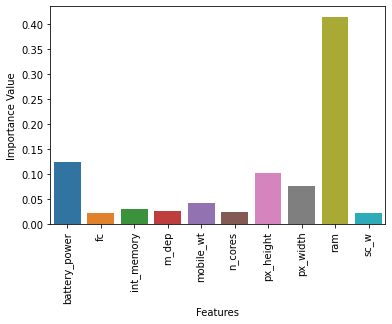

In [ ]:
#bar graph to see which features make impact on output
plt.xticks(rotation=90)
sns.barplot(imp_fea["Features"],imp_fea[0])
plt.ylabel("Importance Value")

In [ ]:
#select dataset feature which is given by feature importance of train data
X_train_final=X_train_scale[imp_fea["Features"]]

#select dataset feature which is given by feature importance of test data
X_test_final=X_test_scale[imp_fea["Features"]]

#count of features before and after feature selection
print("Features before implementation of feature importance {} ".format(len(X_train_scale.columns)))
print("Features after implementation of feature importance {} ".format(len(X_train_final.columns)))

Features before implementation of feature importance 20 
Features after implementation of feature importance 10 


In [ ]:
#model number 2
xgb2=XGBClassifier()
xgb2.fit(X_train_final,y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
#To find accuracy of train data
acc1=xgb2.score(X_train_final, y_train)*100 
print("Train accuracy= {} ".format(acc1))

Train accuracy= 98.625 


In [ ]:
#To find accuracy of test data
acc2=xgb2.score(X_test_final,y_test)*100 
print("Test accuracy= {} ".format(acc2))

Test accuracy= 90.75 


# 3.Hyperparameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]

# Create the random grid
random_parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
              
print(random_parameters)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [ ]:
#model number 3
xgb3=XGBClassifier(subsample=0.5)
xgb3_randomcv=RandomizedSearchCV(estimator=xgb3,param_distributions=random_parameters,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
xgb3_randomcv.fit(X_train_final,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=XGBClassifier(subsample=0.5), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [ ]:
#best parameters for the model
best_parameters=xgb3_randomcv.best_estimator_
best_parameters

XGBClassifier(criterion='entropy', max_depth=1000, max_features='sqrt',
              min_samples_leaf=8, min_samples_split=10, n_estimators=1600,
              objective='multi:softprob', subsample=0.5)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score

In [ ]:
#classification report of train data
y_train_prd=best_parameters.predict(X_train_final)
print("Classification report is : \n {}".format(classification_report(y_train,y_train_prd)))

Classification report is : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       408
           1       1.00      1.00      1.00       403
           2       1.00      1.00      1.00       391
           3       1.00      1.00      1.00       398

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



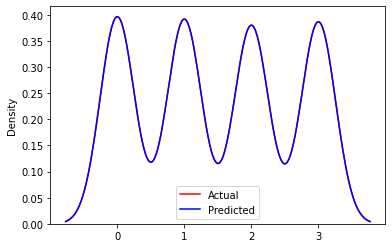

In [ ]:
#plot test accuracy 
ax2=sns.distplot(y_train,hist=False,color="r")
sns.distplot(y_train_prd,hist=False,color="b",ax=ax2)
plt.legend(labels=["Actual","Predicted"])

In [ ]:
#classification report of test data
y_test_prd=best_parameters.predict(X_test_final)
print("Classification report is : \n {}".format(classification_report(y_test,y_test_prd)))

Classification report is : 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        92
           1       0.84      0.90      0.87        97
           2       0.90      0.87      0.88       109
           3       0.96      0.94      0.95       102

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



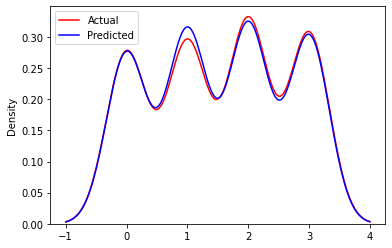

In [ ]:
#plot test accuracy 
ax2=sns.distplot(y_test,hist=False,color="r")
sns.distplot(y_test_prd,hist=False,color="b",ax=ax2)
plt.legend(labels=["Actual","Predicted"])

##**Support Vector Machines**

In [ ]:
from sklearn.svm import SVC

In [ ]:
#fit train data
sv=SVC(kernel="poly")
sv.fit(X_train_final, y_train)       

SVC(kernel='poly')

In [ ]:
#To find accuracy of train data
sv.score(X_train_final, y_train)*100    

92.6875

In [ ]:
#To find accuracy of test data
sv.score(X_test_final, y_test)*100    

84.5

In [ ]:
#To find all intercept values
sv.intercept_  

array([-1.42143411, -0.65300778,  0.02332785,  0.08290923,  0.72640276,
        1.44341744])

In [ ]:
#find predicted values on train data
y_train_prd1=sv.predict(X_train_final) 
y_train_prd1=pd.DataFrame(y_train_prd1)

In [ ]:
#predicted dataframe on train data
y_train_prd 

array([0, 3, 0, ..., 3, 1, 1])

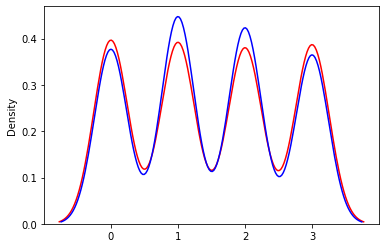

In [ ]:
#plot train accuracy 
ax1=sns.distplot(y_train,hist=False,color="r")
sns.distplot(y_train_prd1,hist=False,color="b",ax=ax1)

In [ ]:
#precision,recall,f1-score,support
from sklearn.metrics import classification_report
matrix_train = classification_report(y_train,y_train_prd1,labels=[0,1,2,3])
print('Classification report : \n',matrix_train)

Classification report : 
               precision    recall  f1-score   support

           0       0.99      0.90      0.94       408
           1       0.88      0.97      0.92       403
           2       0.88      0.94      0.91       391
           3       0.98      0.89      0.93       398

    accuracy                           0.93      1600
   macro avg       0.93      0.93      0.93      1600
weighted avg       0.93      0.93      0.93      1600



In [ ]:
#find predicted values
y_test_prd2=sv.predict(X_test_final)   
y_test_prd=pd.DataFrame(y_test_prd2)

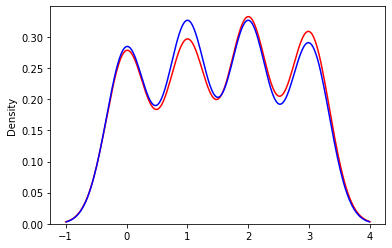

In [ ]:
#plot test accuracy 
ax2=sns.distplot(y_test,hist=False,color="r")
sns.distplot(y_test_prd2,hist=False,color="b",ax=ax2)

In [ ]:
#precision,recall,f1-score,support
from sklearn.metrics import classification_report
matrix_test = classification_report(y_test,y_test_prd2,labels=[0,1,2,3])
print('Classification report : \n',matrix_test)

Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.88      0.88        92
           1       0.77      0.85      0.81        97
           2       0.83      0.81      0.82       109
           3       0.92      0.85      0.88       102

    accuracy                           0.84       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.84      0.85       400



#<font color='red'> **Conclusion**

1.There are only numerical features so we saperate out discrete and continous features.

2.No null values present.

3.This is multi class classification problem.

0-Low cost

1-Medium cost

2-High cost

3-Very high cost

4.From heat diagram we clearly seen that,only "ram" feature has more correlation value with our dependent variable "price_range".

5.Balanced dataset:Each 4 classes contains 25% each.

6.Discrete features also shows balanced property.

7.Classification

a)Train test split with train size=80%

b)Use StandaredScaler to scale the values between mean and standard deviation values.

c)XGBoost:With using XGBoost we create 3 models 

-Model No. 1:Built model with default parameters(train accuracy=99%,test accuracy=91%)

-Model No. 2:Built model with default parameters but use dimensionality reduction.Select thoes features which are important to predict output(train accuracy=98%,test accuracy=91%)

-Model No. 3:Built model with hyperparameter tuning.With using default parameters model give good accuracy so we use RandomSearchCV to give best values of parameters randomly.(train accuracy100%=,test accuracy=91%)

d)Support Vector Machine

This can give good accuracy towards train dataset but not for test data.

train accuracy=92%

test accuracy=85%



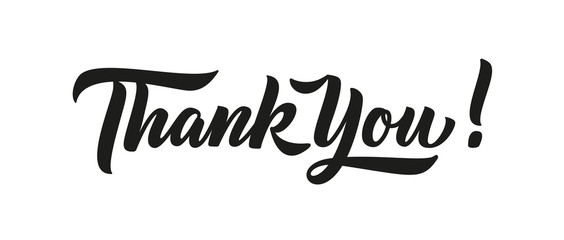